In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, skew, kurtosis,zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [51]:
df=pd.read_csv(r"C:\Users\2273577\Downloads\Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Data Exploration

In [52]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  91 non-null     object 
 1   Age      91 non-null     float64
 2   Salary   91 non-null     float64
 3   Place    91 non-null     object 
 4   Country  91 non-null     object 
 5   Gender   91 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ KB


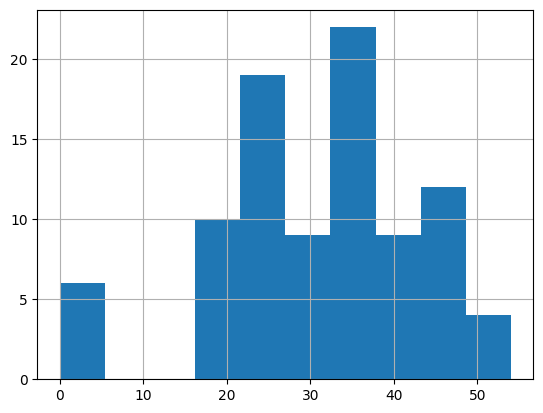

In [54]:
#Histogram
df['Age'].hist()
plt.show()

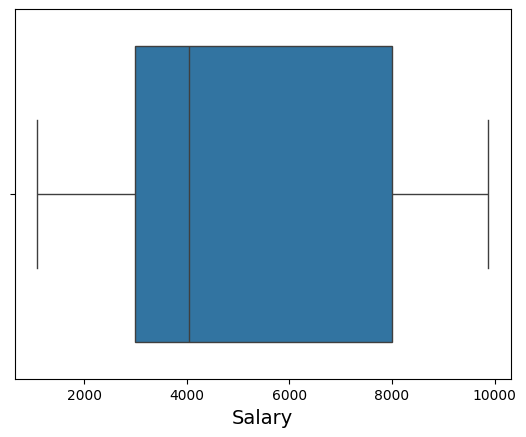

In [55]:
#Boxplot
sns.boxplot(x='Salary', data=df)
plt.xlabel('Salary', fontsize=14)
plt.show()

In [56]:
df.nunique()

Company     6
Age        28
Salary     31
Place      11
Country     1
Gender      2
dtype: int64

In [57]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Congnizant', 'Infosys Pvt Lmt',
       'Tata Consultancy Services'], dtype=object)

In [58]:
df['Age'].unique

<bound method Series.unique of 2      35.0
3      40.0
4      23.0
7      23.0
8      34.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 91, dtype: float64>

In [59]:
df['Salary'].unique

<bound method Series.unique of 2      2300.0
3      3000.0
4      4000.0
7      7000.0
8      8000.0
        ...  
142    8202.0
143    9024.0
145    4034.0
146    5034.0
147    8202.0
Name: Salary, Length: 91, dtype: float64>

In [60]:
df['Place'].unique

<bound method Series.unique of 2      Calcutta
3         Delhi
4        Mumbai
7        Mumbai
8      Calcutta
         ...   
142      Mumbai
143    Calcutta
145       Delhi
146      Mumbai
147      Cochin
Name: Place, Length: 91, dtype: object>

In [61]:
df['Country'].unique

<bound method Series.unique of 2      India
3      India
4      India
7      India
8      India
       ...  
142    India
143    India
145    India
146    India
147    India
Name: Country, Length: 91, dtype: object>

In [62]:
lengths = {col: len(df[col].unique()) for col in df.columns}

In [63]:
print("\nLength of unique values in each feature:")
for col, length in lengths.items():
    print(f"{col}: {length}")


Length of unique values in each feature:
Company: 6
Age: 28
Salary: 31
Place: 11
Country: 1
Gender: 2


In [64]:
df.describe()

,Age,Salary,Gender
count,91.000000,91.000000,91.000000
mean,30.461538,4861.219780,0.219780
std,12.161239,2684.750826,0.416392
min,0.000000,1089.000000,0.000000
25%,22.000000,3000.000000,0.000000
50%,33.000000,4034.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [65]:
df.rename(columns={'Place':'City'},inplace=True)
print("DataFrame with Renamed Columns:")
print(df)

DataFrame with Renamed Columns:
             Company   Age  Salary      City Country  Gender
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
7            Infosys  23.0  7000.0    Mumbai   India       1
8                TCS  34.0  8000.0  Calcutta   India       1
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[91 rows x 6 columns]


In [66]:
df['Gender']=df['Gender'].replace({0:'M',1:'F'})
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [69]:
df['Company'] = df['Company'].replace({'Tata Consultancy Services': 'TCS', 'Congnizant': 'CTS', 'Infosys Pvt Lmt': 'Infosys'})
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS'], dtype=object)

Data Cleaning

In [70]:
missing_values = df.isnull()
print("Missing values in df: ")
print(missing_values)

Missing values in df: 
     Company    Age  Salary   City  Country  Gender
2      False  False   False  False    False   False
3      False  False   False  False    False   False
4      False  False   False  False    False   False
7      False  False   False  False    False   False
8      False  False   False  False    False   False
..       ...    ...     ...    ...      ...     ...
142    False  False   False  False    False   False
143    False  False   False  False    False   False
145    False  False   False  False    False   False
146    False  False   False  False    False   False
147    False  False   False  False    False   False

[91 rows x 6 columns]


In [71]:
df_dropped = df.dropna()
print(df_dropped)

     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


In [72]:
df_dropped['Age'] = df['Age'].fillna(df['Age'].mean())
df_dropped['Salary'] = df['Salary'].fillna(df['Salary'].mean())
print(df_dropped)

     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


In [73]:
inappropriate_values = df[df_dropped['Salary'] <= 0]

print("\nInappropriate values in 'Salary'(negative values):")
print(inappropriate_values)



Inappropriate values in 'Salary'(negative values):
Empty DataFrame
Columns: [Company, Age, Salary, City, Country, Gender]
Index: []


In [74]:
inappropriate_values = df[df_dropped['Age'] <= 0]

print("\nInappropriate values in 'Age'(negative values):")
print(inappropriate_values)



Inappropriate values in 'Age'(negative values):
     Company  Age  Salary        City Country Gender
88   Infosys  0.0  3030.0    Calcutta   India      M
92       TCS  0.0  3045.0       Delhi   India      M
101      CTS  0.0  2034.0  Podicherry   India      M
107      TCS  0.0  9024.0     Chennai   India      F
111  Infosys  0.0  3234.0      Mumbai   India      M
121      CTS  0.0  1234.0    Calcutta   India      M


In [75]:
median_age = df[df['Age'] >= 0]['Age'].median()
df['Age'] = df['Age'].apply(lambda x: x if x >= 0 else median_age)

print("\nDataFrame after treating inappropriate values:")
print(df)


DataFrame after treating inappropriate values:
     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


In [76]:
df_no_duplicates = df_dropped.drop_duplicates()

print("DataFrame after removing duplicate rows:")
print(df_no_duplicates)

DataFrame after removing duplicate rows:
     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


In [77]:
df_zscores = df_dropped.drop(columns=['Company', 'City','Country','Gender'])
# Calculate Z-scores
z_scores = df_zscores.apply(zscore)
print(z_scores)

          Age    Salary
2    0.375258 -0.959273
3    0.788678 -0.697097
4   -0.616950 -0.322559
7   -0.616950  0.801054
8    0.292574  1.175591
..        ...       ...
142 -0.699634  1.251248
143  0.209890  1.559118
145  1.119415 -0.309825
146  0.209890  0.064713
147 -0.699634  1.251248

[91 rows x 2 columns]


In [78]:
Q1 = df_zscores.quantile(0.25)
Q3 = df_zscores.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age         18.0
Salary    5000.0
dtype: float64


In [79]:
numerical_cols = df_zscores.select_dtypes(include=np.number).columns
df_IQR = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_IQR)

     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


In [80]:
df['Age'].replace(0, np.nan, inplace=True)

print("DataFrame after replacing 0 in 'Age' with NaN:")
print(df)

DataFrame after replacing 0 in 'Age' with NaN:
     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


C:\Users\2273577\AppData\Local\Temp\ipykernel_25128\1556388062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)


In [81]:
df_mean = df.copy()
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
df_mean['Salary'].fillna(df_mean['Salary'].mean(), inplace=True)

print("\nDataFrame after replacing null values with mean:")
print(df_mean)


DataFrame after replacing null values with mean:
     Company   Age  Salary      City Country Gender
2        TCS  35.0  2300.0  Calcutta   India      M
3    Infosys  40.0  3000.0     Delhi   India      M
4        TCS  23.0  4000.0    Mumbai   India      M
7    Infosys  23.0  7000.0    Mumbai   India      F
8        TCS  34.0  8000.0  Calcutta   India      F
..       ...   ...     ...       ...     ...    ...
142  Infosys  22.0  8202.0    Mumbai   India      M
143      TCS  33.0  9024.0  Calcutta   India      F
145  Infosys  44.0  4034.0     Delhi   India      F
146      TCS  33.0  5034.0    Mumbai   India      F
147  Infosys  22.0  8202.0    Cochin   India      M

[91 rows x 6 columns]


C:\Users\2273577\AppData\Local\Temp\ipykernel_25128\1137038536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
C:\Users\2273577\AppData\Local\Temp\ipykernel_25128\1137038536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Data Analysis

In [82]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

print("Filtered DataFrame with age > 40 and salary < 5000:")
print(filtered_df)

Filtered DataFrame with age > 40 and salary < 5000:
     Company   Age  Salary       City Country Gender
21   Infosys  50.0  3184.0      Delhi   India      M
32   Infosys  45.0  4034.0   Calcutta   India      M
39   Infosys  41.0  3000.0     Mumbai   India      M
50   Infosys  41.0  3000.0    Chennai   India      M
57   Infosys  51.0  3184.0  Hyderabad   India      M
68   Infosys  43.0  4034.0     Mumbai   India      M
75   Infosys  44.0  3000.0     Cochin   India      M
86   Infosys  41.0  3000.0      Delhi   India      M
93   Infosys  54.0  3184.0     Mumbai   India      M
104  Infosys  44.0  4034.0      Delhi   India      M
122  Infosys  44.0  3234.0     Mumbai   India      M
129  Infosys  50.0  3184.0   Calcutta   India      M
138      CTS  44.0  3033.0     Cochin   India      M
140  Infosys  44.0  4034.0  Hyderabad   India      M
145  Infosys  44.0  4034.0      Delhi   India      F


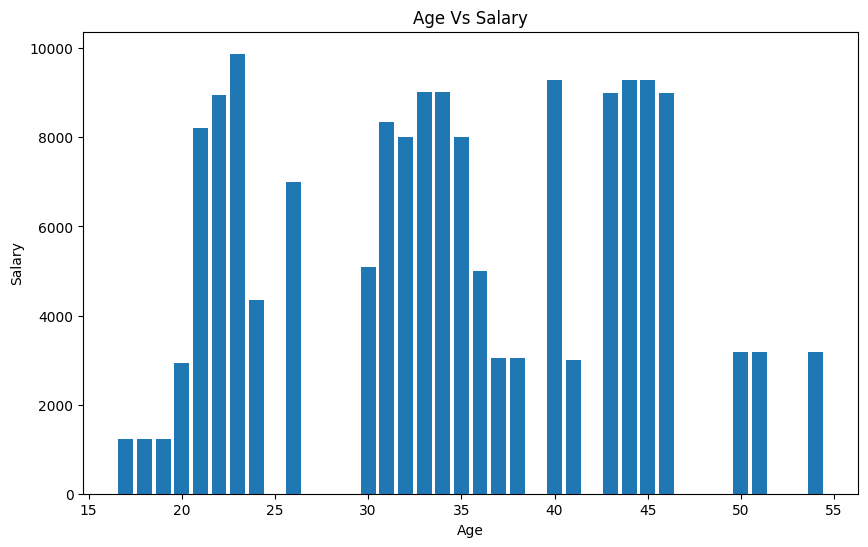

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age Vs Salary')
plt.show()

In [84]:
city_counts = df['City'].value_counts()
print(city_counts)

City
Calcutta      23
Mumbai        23
Delhi         12
Cochin        10
Chennai        6
Noida          6
Hyderabad      5
Podicherry     3
Bhopal         1
Nagpur         1
Pune           1
Name: count, dtype: int64


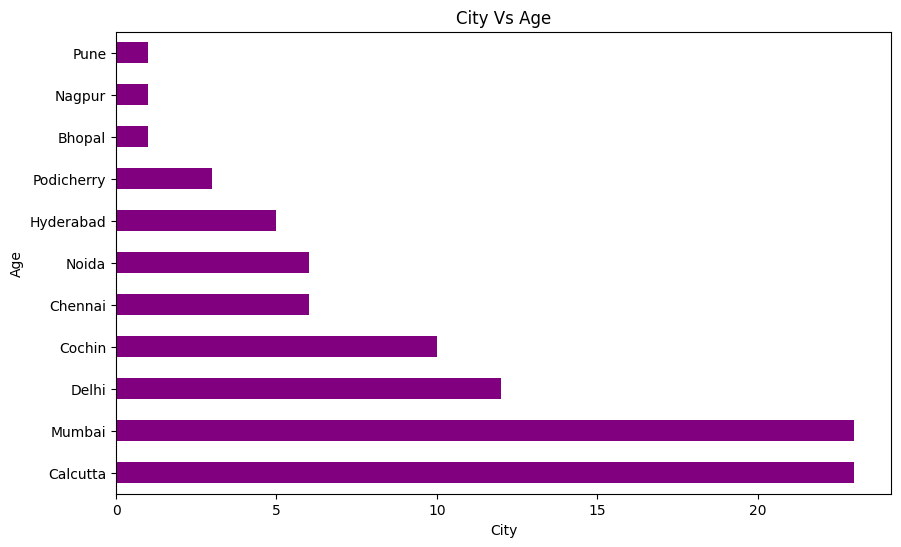

In [85]:
plt.figure(figsize=(10, 6))
city_counts.plot(kind='barh',color='purple')
plt.xlabel('City')
plt.ylabel('Age')
plt.title('City Vs Age')
plt.show()

Data Encoding

In [89]:
df.head()

,Company,Age,Salary,City,Country,Gender
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M
7,Infosys,23.0,7000.0,Mumbai,India,F
8,TCS,34.0,8000.0,Calcutta,India,F


In [88]:
df.describe()

,Age,Salary
count,85.000000,91.000000
mean,32.611765,4861.219780
std,9.354263,2684.750826
min,17.000000,1089.000000
25%,23.000000,3000.000000
50%,33.000000,4034.000000
75%,40.000000,8000.000000
max,54.000000,9876.000000


In [94]:
df_dropped.drop('Country',axis=1,inplace=True)

In [95]:
df.head()

,Company,Age,Salary,City,Gender
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
7,Infosys,23.0,7000.0,Mumbai,F
8,TCS,34.0,8000.0,Calcutta,F


In [98]:
# One-hot encoding
df_one_hot = pd.get_dummies(df_mean, columns=['Gender'])

print(df_one_hot)


     Company   Age  Salary      City Country  Gender_F  Gender_M
2        TCS  35.0  2300.0  Calcutta   India     False      True
3    Infosys  40.0  3000.0     Delhi   India     False      True
4        TCS  23.0  4000.0    Mumbai   India     False      True
7    Infosys  23.0  7000.0    Mumbai   India      True     False
8        TCS  34.0  8000.0  Calcutta   India      True     False
..       ...   ...     ...       ...     ...       ...       ...
142  Infosys  22.0  8202.0    Mumbai   India     False      True
143      TCS  33.0  9024.0  Calcutta   India      True     False
145  Infosys  44.0  4034.0     Delhi   India      True     False
146      TCS  33.0  5034.0    Mumbai   India      True     False
147  Infosys  22.0  8202.0    Cochin   India     False      True

[91 rows x 7 columns]


Feature Scaling

In [99]:
# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_one_hot), columns=df_encoded.columns)

# Apply MinMaxScaler
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_one_hot), columns=df_encoded.columns)

print("Standard Scaled DataFrame:")
print(df_standard_scaled)

print("\nMinMax Scaled DataFrame:")
print(df_minmax_scaled)

ValueError: could not convert string to float: 'TCS'

Feature Scaling

In [104]:
data=df_dropped.iloc[ : ,[1,2]]
print(data)

      Age  Salary
2    35.0  2300.0
3    40.0  3000.0
4    23.0  4000.0
7    23.0  7000.0
8    34.0  8000.0
..    ...     ...
142  22.0  8202.0
143  33.0  9024.0
145  44.0  4034.0
146  33.0  5034.0
147  22.0  8202.0

[91 rows x 2 columns]


In [105]:
scaler=StandardScaler().fit(data)
print(scaler)

StandardScaler()


In [108]:
data_scaled=scaler.transform(data)
print(data_scaled)

[[ 0.37525828 -0.95927318]
 [ 0.78867843 -0.69709684]
 [-0.61695006 -0.32255921]
 [-0.61695006  0.80105367]
 [ 0.29257426  1.1755913 ]
 [ 1.20209857  1.55012893]
 [ 0.29257426 -1.41283825]
 [-1.0303702  -1.3585303 ]
 [ 0.78867843 -0.69709684]
 [-0.61695006 -0.69709684]
 [-0.61695006 -0.68586071]
 [ 0.29257426  0.05197841]
 [ 0.54062634 -0.68024265]
 [ 1.61551871 -0.62818192]
 [-0.78231812 -0.01394021]
 [-0.61695006  1.52878029]
 [ 0.29257426  1.30480678]
 [ 1.20209857  1.65649762]
 [-0.61695006  1.87822389]
 [ 0.37525828 -1.05890019]
 [ 1.2847826   1.04600128]
 [-0.86500215 -0.72181633]
 [ 1.20209857 -0.30982494]
 [ 0.29257426 -0.95927318]
 [ 0.87136246 -0.69709684]
 [-0.53426603 -0.19334373]
 [ 0.37525828  1.1755913 ]
 [ 1.2847826   1.55012893]
 [ 0.1272062  -1.41283825]
 [-0.94768617 -1.3585303 ]
 [ 0.87136246 -0.69709684]
 [-0.78231812 -0.68586071]
 [ 0.37525828  0.05197841]
 [-0.78231812  0.63026451]
 [ 0.1272062   1.04600128]
 [ 0.62331037 -0.68024265]
 [ 1.69820274 -0.62818192]
 

In [109]:
print(data_scaled.mean(axis=0))

[ 1.35422808e-16 -1.56163239e-16]


In [110]:
print(data_scaled.std(axis=0))

[1. 1.]


In [111]:
scaled_data_set=pd.DataFrame(data_scaled,columns=data.columns)
scaled_data_set

,Age,Salary
0,0.375258,-0.959273
1,0.788678,-0.697097
2,-0.616950,-0.322559
3,-0.616950,0.801054
4,0.292574,1.175591
...,...,...
86,-0.699634,1.251248
87,0.209890,1.559118
88,1.119415,-0.309825
89,0.209890,0.064713


In [112]:
data=df.iloc[ : ,[1,2]]
data

,Age,Salary
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
7,23.0,7000.0
8,34.0,8000.0
...,...,...
142,22.0,8202.0
143,33.0,9024.0
145,44.0,4034.0
146,33.0,5034.0


In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler=MinMaxScaler().fit(data)
print(scaler)

MinMaxScaler()


In [115]:
scaler.data_min_

array([  17., 1089.])

In [116]:
scaler.data_max_

array([  54., 9876.])

In [117]:
data.describe()

,Age,Salary
count,85.000000,91.000000
mean,32.611765,4861.219780
std,9.354263,2684.750826
min,17.000000,1089.000000
25%,23.000000,3000.000000
50%,33.000000,4034.000000
75%,40.000000,8000.000000
max,54.000000,9876.000000


In [118]:
#check feature range
scaler.feature_range

(0, 1)

In [120]:
data_scaled_mm=scaler.transform(data)
print(data_scaled_mm)

[[0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.45945946 0.        ]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]
 [0.18918919 0.3705474 ]
 [0.48648649 0.78650279]
 [0.78378378 0.90030727]
 [0.40540541 0.        ]
 [0.05405405 0.01650165]
 [0.64864865 0.21748037]
 [0.10810811 0.2208945 ]
 [0.48648649 0.44508934]
 [0.10810811 0.62080346]
 [0.40540541 0.74712644]
 [0.56756757 0.22260157]
 [0.91891892 0.23842039]
 [0.16216216 0.42505975]
 [0.37837838 0.10754524]
 [0.10810811 0.20996927]


In [121]:
mm_scaled_data_set=pd.DataFrame(data_scaled_mm,columns=data.columns)
mm_scaled_data_set

,Age,Salary
0,0.486486,0.137817
1,0.621622,0.217480
2,0.162162,0.331285
3,0.162162,0.672698
4,0.459459,0.786503
...,...,...
86,0.135135,0.809491
87,0.432432,0.903039
88,0.729730,0.335154
89,0.432432,0.448959
